## Grupo de trabajo: Alejandro Hernández A. y Nicolás A. Morales D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

Para un sistema markoviano conformado por una partícula libre con función de acople $f(x) = Sin(x)$, la ecuación de movimiento es:

$$
\large
m\ddot x + m\alpha cos^2(x)\dot x = 0
$$

Y despejando para la aceleración tenemos que:

$$
\large
\ddot x = -\alpha cos^2(x)\dot x 
$$

A continuación se resuelve y grafica la solución de esta ecuación diferencial usando el método ```odeint``` visto en el cuaderno ```10-ODE.ipynb```. Al principio de intentó solucionar con Runge Kutta de 4 orden, no obstante, observamos que con ```odeint``` se podían poner pasos mucho más pequeños y, por ende, obtener una solución más exacta de la susodicha ecuación diferencial.

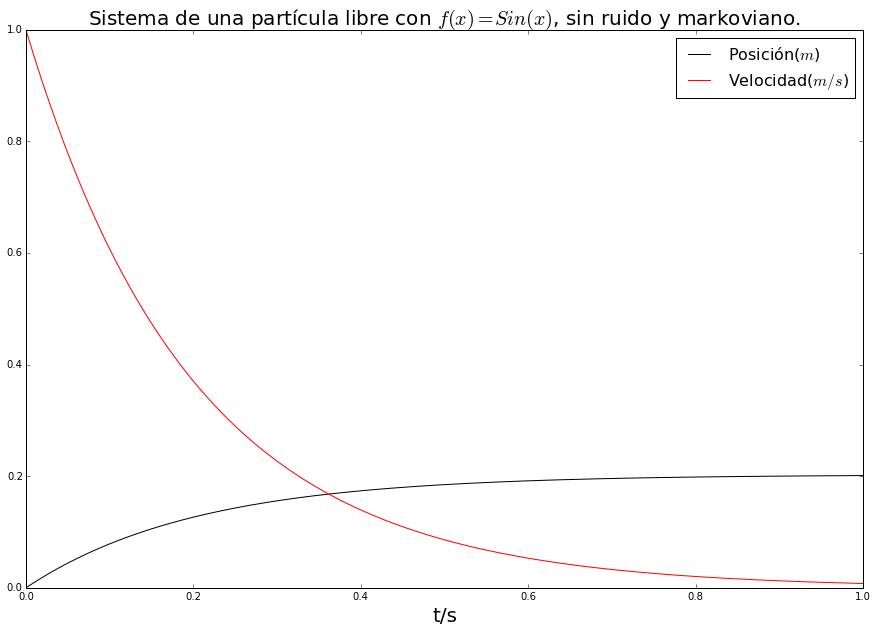

In [14]:
%matplotlib inline
alpha = 5. # Constante requerida para solucionar la ec. diferencial. Físicamente juega el papel del amortiguamiento
           # del sistema.
times=np.linspace(0,1.,1000000)
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1]]) # Función que devuelve la derivada del vector Y = [x,v].


funsol,others=odeint(f,[0.,1.],times,full_output=True) # Solución de a ecuación diferencial usando odeint con 
                                                       # consiciones iniciales x0 = 0 m y v0 = 1 m/s.

# Gráfica del vector solución.
plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición($m$)')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad($m/s$)')
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, sin ruido y markoviano.',fontsize=20)
#plt.savefig('1')
plt.show()

In [3]:
# Animación de los resultados mostrados previemente.
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,1.,1000000)
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,1.)

alphas = np.arange(0.,30.)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-alphas[i]*(np.cos(Y[0])**2)*Y[1]]) 
    funsol,others=odeint(f,[0.,1.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    vel.set_data(times,funsol[:,1])
    plt.ylim(0.,max(funsol[:,1])+0.1)
    return pos,vel

anim = animation.FuncAnimation(fig,animate,30,interval=100,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, sin ruido y markoviano.',fontsize=20)
plt.tight_layout()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
#anim.save(u'1_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


En la animación anterior se puede ver la evolución tanto de la posición como de la velocidad en función del parámetro de amortiguamiento $\alpha$. En particular, es claro que entre mayor sea $\alpha$, más rápidamente decae la velocidad a su valor terminal, a saber, v = 0, lo cual es totalmente esperado a partir del significado físico de este parámetro.

El segundo sistema abordado es análogo al anterior pero se considera ls función de acople $f(x) = x^{2}$. A simple vista, los resultados para la posición no cambian mucho, no obstante, la velocidad cambia radicalmente.

La ecuación de movimiento es ahora:

$$
m\ddot x + 4m\alpha x^2 \dot x = 0
$$

Y despejando para la aceleración:

$$
\ddot x = -4\alpha x^2 \dot x
$$

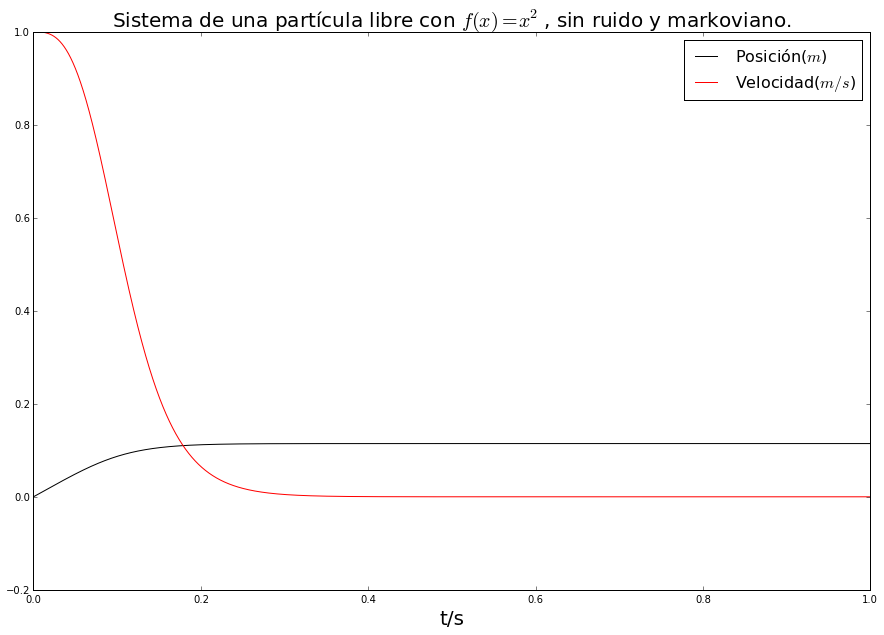

In [7]:
%matplotlib inline
alpha = 500. # Se aumenta considerablemente este valor para apreciar mejores resultados gráficos.
def f(Y,t):
    return np.array([Y[1],-4*alpha*(Y[0]**2)*Y[1]]) # La definición de la función y la solución de la ecuación 
                                                    # diferencial es análoga a lo hecho previamente.

times=np.linspace(0,1.,100000)
funsol,others=odeint(f,[0.,1.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición($m$)')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad($m/s$)')
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = x^2$, sin ruido y markoviano.',fontsize=20)
plt.show()

In [11]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,1.,100000)
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,1.)

alphas = np.arange(1.,1001.)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-4*alphas[i]*(Y[0]**2)*Y[1]]) 
    funsol,others=odeint(f,[0.,1.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    vel.set_data(times,funsol[:,1])
    plt.ylim(0.,max(funsol[:,1])+0.01)
    return pos,

anim = animation.FuncAnimation(fig,animate,np.arange(1,1001,20),interval=10,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = x^2$, sin ruido y markoviano.',fontsize=20)
plt.tight_layout()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
#anim.save(u'2_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


En la animación anterior se puede apreciar un comportamiento análogo al sistema previamente solucionado, siendo la mayor deiferencia que la velocidad de la partícula no comienza a decaer imediatamente después de que es "liberada" sino que permanece estable por cierto tiempo antes de comenzar a decaer. Esta diferencia se debe claramente a la función de acople utilizada y a as condiciones iniciales. Como el acople es $x^2$ y $x_{0} = 0$, el acople no es muy fuerte en los instantes iniciales pero va aumentando a medida que pasa el tiempo.

Para un sistema de una partícula libre con función de acople $f(x) = Sin(x)$, ruido $\xi (t)= Cos(t)$ y markoviano, la ecuación de movimiento es:

$$
\large
m\ddot x + m\alpha cos^2(x)\dot x = Fcos(x)cos(t)
$$

Donde F es una constante que permite ajustar las unidades. Al despejar nuevamente para la aceleración se obtiene:

$$
\large
\ddot x = -\alpha cos^2(x)\dot x + \frac{F}{m}cos(x)cos(t)
$$

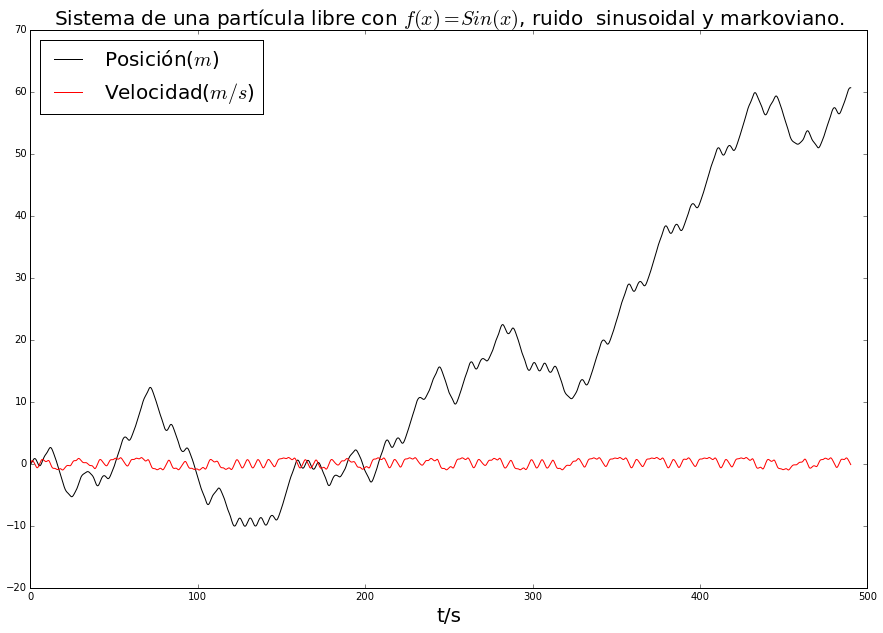

In [18]:
%matplotlib inline
mass = 1.
alpha = 1.
# Tambien se asume F = 1. para la solución de la ecuación diferencial puesto que ya se dijo que simplemente 
# ayuda a que el lado derecho de la ecuaación tenga las unidades correctas.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.cos(t)]) 

times=np.linspace(0,490.,1000000)
funsol,others=odeint(f,[0.,0.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición($m$)')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad($m/s$)')
plt.legend(loc='best',fontsize=20)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido  sinusoidal y markoviano.',fontsize=20)
#plt.savefig('2')
plt.show()

In [19]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,490.,100000)
mass = 1.
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,490.)

alphas = np.linspace(0.,2.,100)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-alphas[i]*(np.cos(Y[0])**2)*Y[1] + (1./mass)*np.cos(Y[0])*np.cos(t)]) 
                                
    funsol,others=odeint(f,[0.,0.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    vel.set_data(times,funsol[:,1])
    plt.ylim(min(funsol[:,0])-0.1,max(funsol[:,0])+0.1)
    return pos,vel

anim = animation.FuncAnimation(fig,animate,np.arange(0,100,2),interval=500,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido sinusoidal y markoviano.',fontsize=20)
plt.tight_layout()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)
#anim.save(u'3_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


La animación anterior permite observar una evolución relativamente caótica para el sistema cuando se añade un ruido sinusoidal del mismo. Dicha evolución puede ser explicada al tener en cuenta el ruido como un forzamiento externo, pues de este modo, siempre que la frecuencia del sistema se acople con la del "forzamiento" externo, se produce el fenómeno de resonancia observado en las múltiples imágenes mostadas previamente. 
Otro aspecto a destacar de la anterior animación es el eminente carácter oscilatorio observado tanto en la posición como en la velocidad de la partícula, además, que para la mayoría de valores del parámetro $\alpha$, las oscilaciones de a velocidad son mucho menos amplias que las de la posición.

Al cambiar el ruido por $\xi (t) = Sin(t)$, la aceleración se convierte en:

$$
\large
\ddot x = -\alpha cos(x)\dot x + \frac{F}{m}cos(x)sin(t)
$$

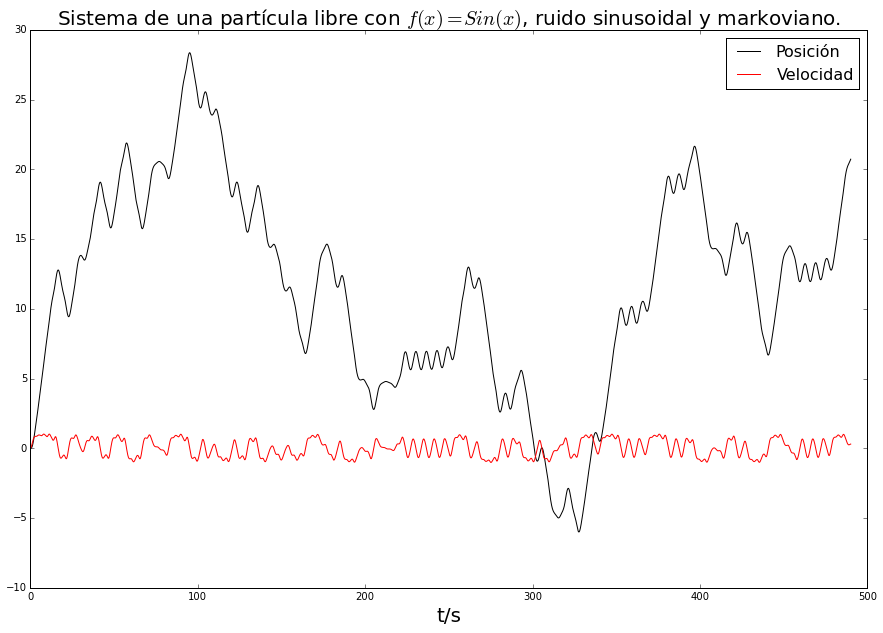

In [20]:
%matplotlib inline
mass = 1.
alpha = 1.
# Se asume nuevamente F = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.sin(t)]) 

times=np.linspace(0,490.,100000)
funsol,others=odeint(f,[0.,0.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido sinusoidal y markoviano.',fontsize=20)
#plt.savefig('3')
plt.show()

In [20]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,490.,100000)
mass = 0.1
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,490.)

alphas = np.linspace(0.,2.,100)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-alphas[i]*np.cos(Y[0])*Y[1] + (1./mass)*np.cos(Y[0])*np.sin(t)]) 
    funsol,others=odeint(f,[0.,0.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    vel.set_data(times,funsol[:,1])
    plt.ylim(min(funsol[:,0])-0.1,max(funsol[:,0])+0.1)
    return pos

anim = animation.FuncAnimation(fig,animate,np.arange(0,100,2),interval=500,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido sinusoidal y markoviano.',fontsize=20)
plt.tight_layout()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)
#anim.save(u'4_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


Al cambiar el ruido de $cos(t)$ a $sin(t)$ no se observan cambios muy significativos, el comportamiento oscilatorio sigue prediominando en la solución y se hacen más notables el diverso y caótico comportamiento tanto de la posición como de la velocidad de la partícula con respecto al parámetro $\alpha$.

Cambiando ahora a ruido exponencial creciente $\xi (t) = Fe^{t}$, la aceleración es.

$$
\large
\ddot x = -\alpha cos(x)\dot x + \frac{F}{m}cos(x)e^{t}
$$

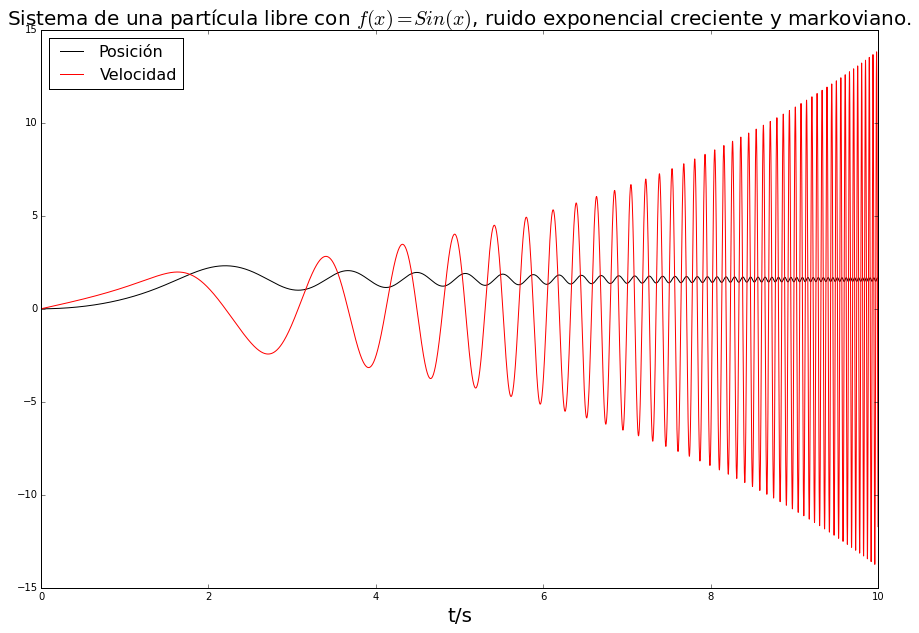

In [21]:
%matplotlib inline
mass = 1.
alpha = 1.
# Siempre se asume F = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(t)]) 

times=np.linspace(0,10.,100000)
funsol,others=odeint(f,[0.,0.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido exponencial creciente y markoviano.',
          fontsize=20)
#plt.savefig('4')
plt.show()

In [23]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,10.,100000)
mass = 0.1
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,10.)

alphas = np.linspace(0.,2.,100)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-alphas[i]*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(t)]) 
    funsol,others=odeint(f,[0.,0.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    vel.set_data(times,funsol[:,1])
    plt.ylim(min(funsol[:,1])-0.1,max(funsol[:,1])+0.1)
    return pos,vel

anim = animation.FuncAnimation(fig,animate,np.arange(0,100,2),interval=500,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido exponencial creciente y markoviano.',
          fontsize=20)
plt.tight_layout()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)
#anim.save(u'5_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


Como se puede ver, la solución para ruido exponencial creciente es muy estable y no hay cambios notables salvo la amplitud de la misma. El efecto de la exponencial creciente pude notar de dos formas: en la frecuencia de las oscilaciones de la posición, que va aumentando a medida que pasa el tiempo, y en la amplitud de la velocidad de la partícula, que claramente tiene una envolvente forma envolvente exponencial.

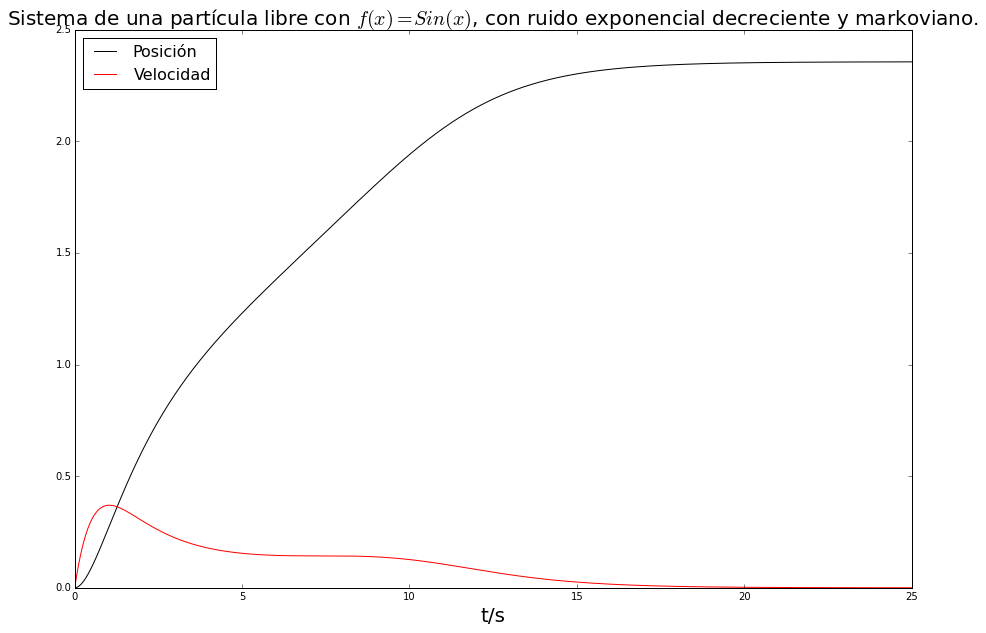

In [23]:
%matplotlib inline
mass = 1.
alpha = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(-t)]) 

times=np.linspace(0,20.,100000)
funsol,others=odeint(f,[0.,0.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, con ruido exponencial decreciente y markoviano.',
          fontsize=20)
#plt.savefig('5')
plt.show()

In [27]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,20.,100000)
mass = 0.1
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,20.)

alphas = np.linspace(0.,2.,100)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-alphas[i]*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(-t)]) 
    funsol,others=odeint(f,[0.,0.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    vel.set_data(times,funsol[:,1])
    plt.ylim(min(funsol[:,1])-0.1,max(funsol[:,0])+0.1)
    return pos,vel

anim = animation.FuncAnimation(fig,animate,np.arange(0,100,2),interval=500,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido exponencial decreciente y markoviano.',
          fontsize=20)
plt.tight_layout()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)
#anim.save(u'6_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


En la animación anterior se observa claramente el efecto del ruido exponencial decreciente sobre la partícula: a medida que pasa el tiempo su efecto se hace más evidente, a tal punto de forzar que la partícula deje de moverse, es decir, la posición terminal de la partícula es constante y su velocidad es cero.

Ahora bien, para un sistema conformado por un oscilador armónico con $f(x) = Sin(x)$, ruido exponencial decreciente y markoviano, la ecuación de movimiento es:

$$
\large
m\ddot x + m\omega ^2 x + m\alpha cos(x)\dot x = Fcos(x)e^{-t}
$$

Y despejando para la aceleración se tiene que:

$$
\large
\ddot x = -\omega ^2 x - \alpha cos(x)\dot x + \frac{F}{m}cos(x)e^{-t}
$$

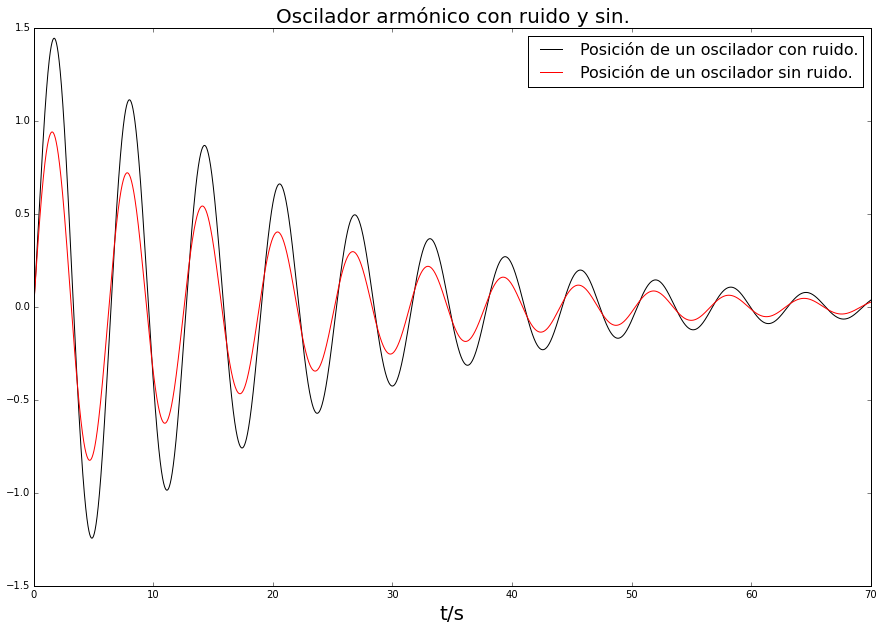

In [3]:
%matplotlib inline
mass = 1.
omega = 1.
alpha = .1
def f1(Y,t):
    return np.array([Y[1],-(omega**2)*Y[0] - alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(-t)]) 

def f2(Y,t):
    return np.array([Y[1],-(omega**2)*Y[0] - alpha*(np.cos(Y[0])**2)*Y[1]]) 

times=np.linspace(0,70.,100000)
funsol1,others1=odeint(f1,[0.,1.],times,full_output=True)
funsol2,others2=odeint(f2,[0.,1.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol1[:,0],'k',label=u'Posición de un oscilador con ruido.')
plt.plot(times,funsol2[:,0],'r',label=u'Posición de un oscilador sin ruido.')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Oscilador armónico con ruido y sin.',fontsize=20)
#plt.savefig('6')
plt.show()

In [4]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,70.,100000)
mass = 1.
omega = 1.
pos1, = plt.plot([],[],'k',label=u'Posición de un oscilador con ruido.')
pos2, = plt.plot([],[],'r',label=u'Posición de un oscilador sin ruido.')
plt.xlim(0.,70.)

alphas = np.linspace(0.,2.,100)
def animate(i):
    def f1(Y,t):
        return np.array([Y[1],-(omega**2)*Y[0] - alphas[i]*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(-t)]) 

    def f2(Y,t):
        return np.array([Y[1],-(omega**2)*Y[0] - alphas[i]*(np.cos(Y[0])**2)*Y[1]]) 

    funsol1,others1=odeint(f1,[0.,1.],times,full_output=True)
    funsol2,others2=odeint(f2,[0.,1.],times,full_output=True)
    pos1.set_data(times,funsol1[:,0])
    pos2.set_data(times,funsol2[:,0])
    plt.ylim(min(funsol1[:,0])-0.1,max(funsol1[:,0])+0.1)
    return pos1,pos2

anim = animation.FuncAnimation(fig,animate,np.arange(0,100,2),interval=100,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de un oscilador armónico con y sin ruido.',fontsize=20)
plt.tight_layout()
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)
#anim.save(u'7_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


En la animación anterior se puede ver el comprtamiento de un oscilador con y sin ruido y la transición de ambos por etapas de subamortiguamiento, sobreamortiguamiento y amortiguamiento crítico. Es importante notar que en esta ocasión el ruido hace que la amplitud del oscilador sea considerablemente menos que en ausencia del mismo.

Ahora bien, con fines de completitud, acontinuación se muestran gráficas en las que se trabaja con acople $cos(x)$. Sus explicaciones son análogas a las presentadas previamente y el método de solucion es completamente análogo.

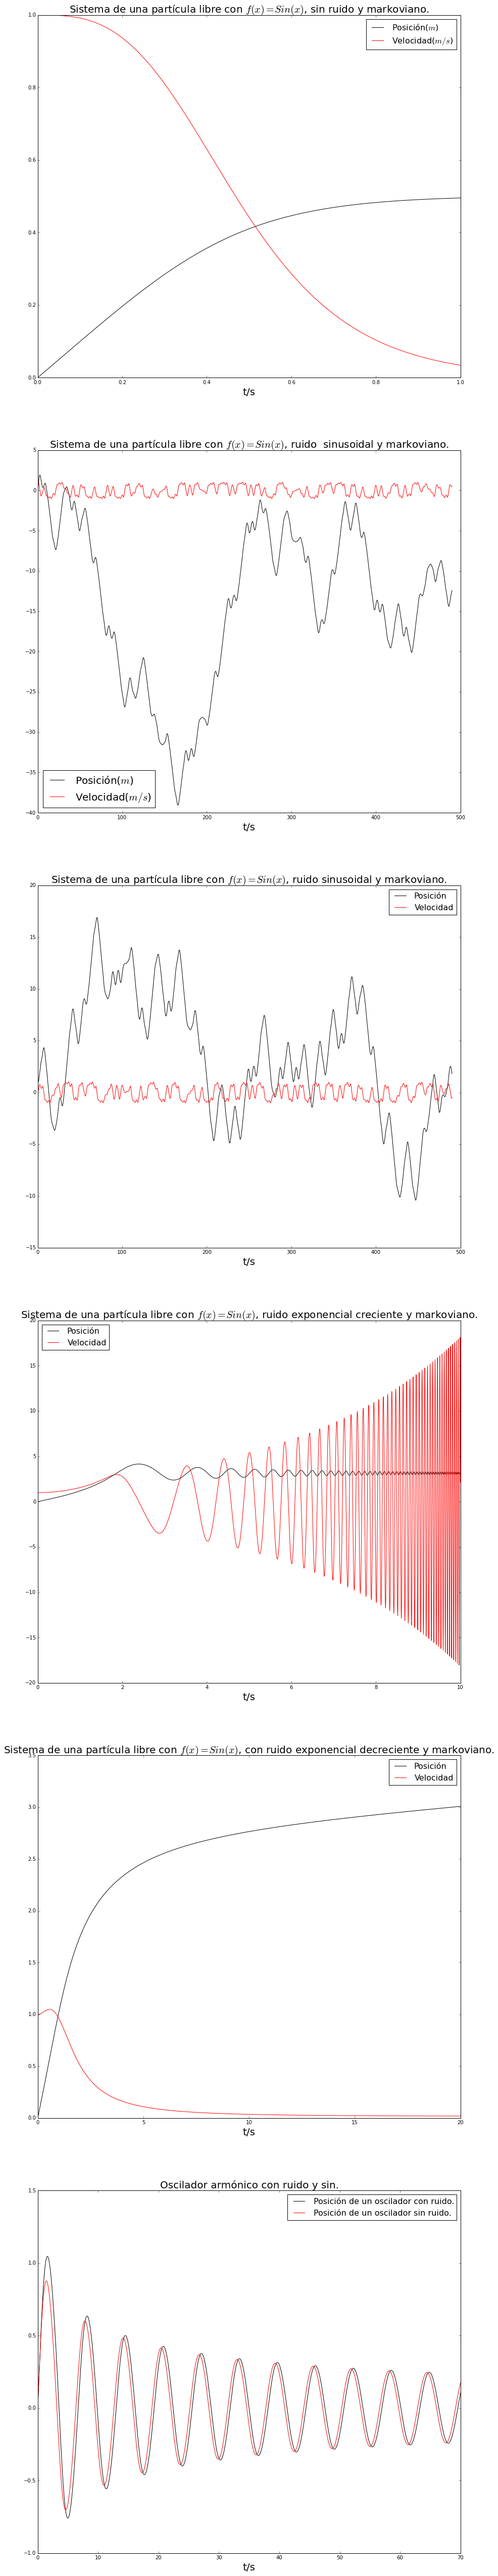

In [18]:
%matplotlib inline
plt.figure(figsize=(15,90))

plt.subplot(6,1,1)
alpha = 25. 
times=np.linspace(0,1.,1000000)
def f(Y,t):
    return np.array([Y[1],-alpha*(np.sin(Y[0])**2)*Y[1]]) 
funsol,others=odeint(f,[0.,1.],times,full_output=True)
plt.plot(times,funsol[:,0],'k',label=u'Posición($m$)')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad($m/s$)')
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, sin ruido y markoviano.',fontsize=20)

plt.subplot(6,1,2)
mass = 1.
alpha = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.sin(Y[0])**2)*Y[1] + (1/mass)*np.sin(Y[0])*np.cos(t)]) 

times=np.linspace(0,490.,1000000)
funsol,others=odeint(f,[0.,1.],times,full_output=True)
plt.plot(times,funsol[:,0],'k',label=u'Posición($m$)')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad($m/s$)')
plt.legend(loc='best',fontsize=20)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido  sinusoidal y markoviano.',fontsize=20)

plt.subplot(6,1,3)
mass = 1.
alpha = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.sin(Y[0])**2)*Y[1] + (1/mass)*np.sin(Y[0])*np.sin(t)]) 

times=np.linspace(0,490.,100000)
funsol,others=odeint(f,[1.,0.],times,full_output=True)
plt.plot(times,funsol[:,0],'k',label=u'Posición')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido sinusoidal y markoviano.',fontsize=20)

plt.subplot(6,1,4)
mass = 1.
alpha = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.sin(Y[0])**2)*Y[1] + (1/mass)*np.sin(Y[0])*np.exp(t)]) 

times=np.linspace(0,10.,100000)
funsol,others=odeint(f,[0.,1.],times,full_output=True)
plt.plot(times,funsol[:,0],'k',label=u'Posición')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido exponencial creciente y markoviano.',
          fontsize=20)

plt.subplot(6,1,5)
mass = 1.
alpha = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.sin(Y[0])**2)*Y[1] + (1/mass)*np.sin(Y[0])*np.exp(-t)]) 

times=np.linspace(0,20.,100000)
funsol,others=odeint(f,[0.,1.],times,full_output=True)
plt.plot(times,funsol[:,0],'k',label=u'Posición')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, con ruido exponencial decreciente y markoviano.',
          fontsize=20)

plt.subplot(6,1,6)
mass = 1.
omega = 1.
alpha = 1.
def f1(Y,t):
    return np.array([Y[1],-(omega**2)*Y[0] - alpha*(np.sin(Y[0])**2)*Y[1] + (1/mass)*np.sin(Y[0])*np.exp(-t)]) 

def f2(Y,t):
    return np.array([Y[1],-(omega**2)*Y[0] - alpha*(np.sin(Y[0])**2)*Y[1]]) 

times=np.linspace(0,70.,100000)
funsol1,others1=odeint(f1,[0.,1.],times,full_output=True)
funsol2,others2=odeint(f2,[0.,1.],times,full_output=True)
plt.plot(times,funsol1[:,0],'k',label=u'Posición de un oscilador con ruido.')
plt.plot(times,funsol2[:,0],'r',label=u'Posición de un oscilador sin ruido.')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Oscilador armónico con ruido y sin.',fontsize=20)

plt.show()